# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

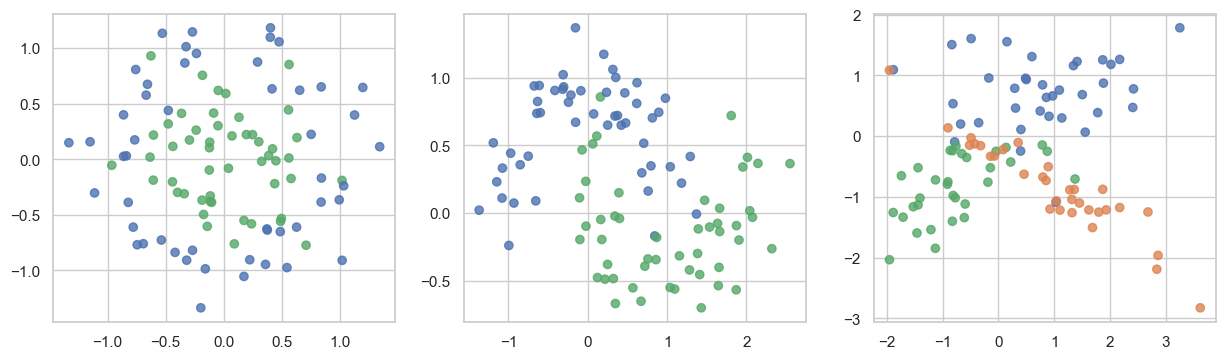

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

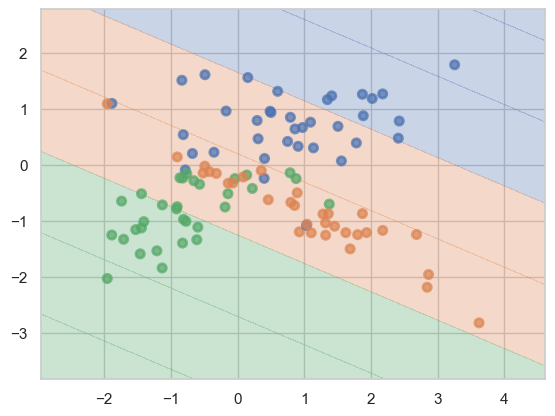

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plt.plot()
plot_surface(lr, X, y, plt)

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.datasets import make_moons, make_circles, make_classification
test_datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=0),
    make_moons(noise=0.2, random_state=0),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [10]:

def estimate_acc(i, ax):

    X, y = datasets[i]
    X_test, y_test = test_datasets[i]
    clf = DecisionTreeClassifier().fit(X, y)
    plot_surface(clf, X, y, ax)
    y_pred_train = clf.predict(X)
    score_train = accuracy_score(y, y_pred_train)
    print(f'train accuracy for {i} dataest:', score_train)
    y_pred_test = clf.predict(X_test)
    score_test = accuracy_score(y_test, y_pred_test)
    print(f'test accuracy for {i} dataset:', score_test)
    

train accuracy for 0 dataest: 1.0
test accuracy for 0 dataset: 0.83
train accuracy for 1 dataest: 1.0
test accuracy for 1 dataset: 0.97
train accuracy for 2 dataest: 1.0
test accuracy for 2 dataset: 1.0


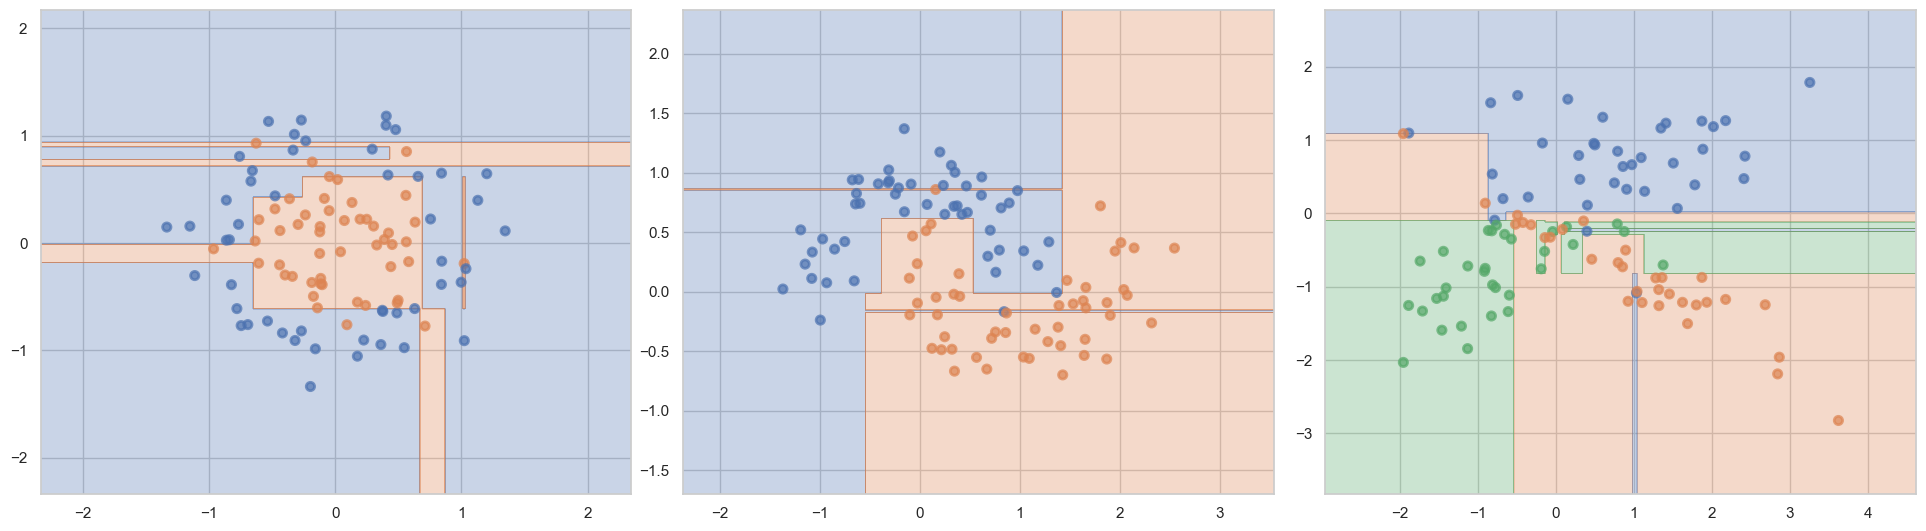

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
estimate_acc(0, ax[0])
estimate_acc(1, ax[1])
estimate_acc(2, ax[2])



__Ответ:__ Деревья очень сильно переобучились, что подтверждаеи accuracy_train = 1, поэтому на графиках много тонких линий

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [12]:
from collections import defaultdict as dd

In [13]:
def get_best_params(i, datasets, test_datasets, ax):
    best_params = dd()
    best_val_acc = 0
    X, y = datasets[i]
    X_test, y_test = test_datasets[i]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    for max_depth in range(1, 6):
        for min_samples_leaf in range(1, 7):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            plot_surface(clf, X, y, ax[max_depth - 1][min_samples_leaf - 1])

            y_pred_train = clf.predict(X_train)
            score_train = accuracy_score(y_train, y_pred_train)

            y_pred_val = clf.predict(X_val)
            score_val = accuracy_score(y_val, y_pred_val)


            y_pred_test = clf.predict(X_test)
            score_test = accuracy_score(y_test, y_pred_test)

            ax[max_depth - 1][min_samples_leaf - 1].set_title(f'train acc: {np.round(score_train, 4)} \n val acc: {np.round(score_val, 4)} \n test acc: {np.round(score_test, 4)}', fontsize=15)
            if (score_val > best_val_acc):
                best_val_acc = score_val
                best_params['max_depth'] = max_depth
                best_params['min_samples_leaf'] = min_samples_leaf
                best_params['train_acc'] = score_train
                best_params['val_acc'] = score_val
                best_params['test_acc'] = score_test
    return best_params

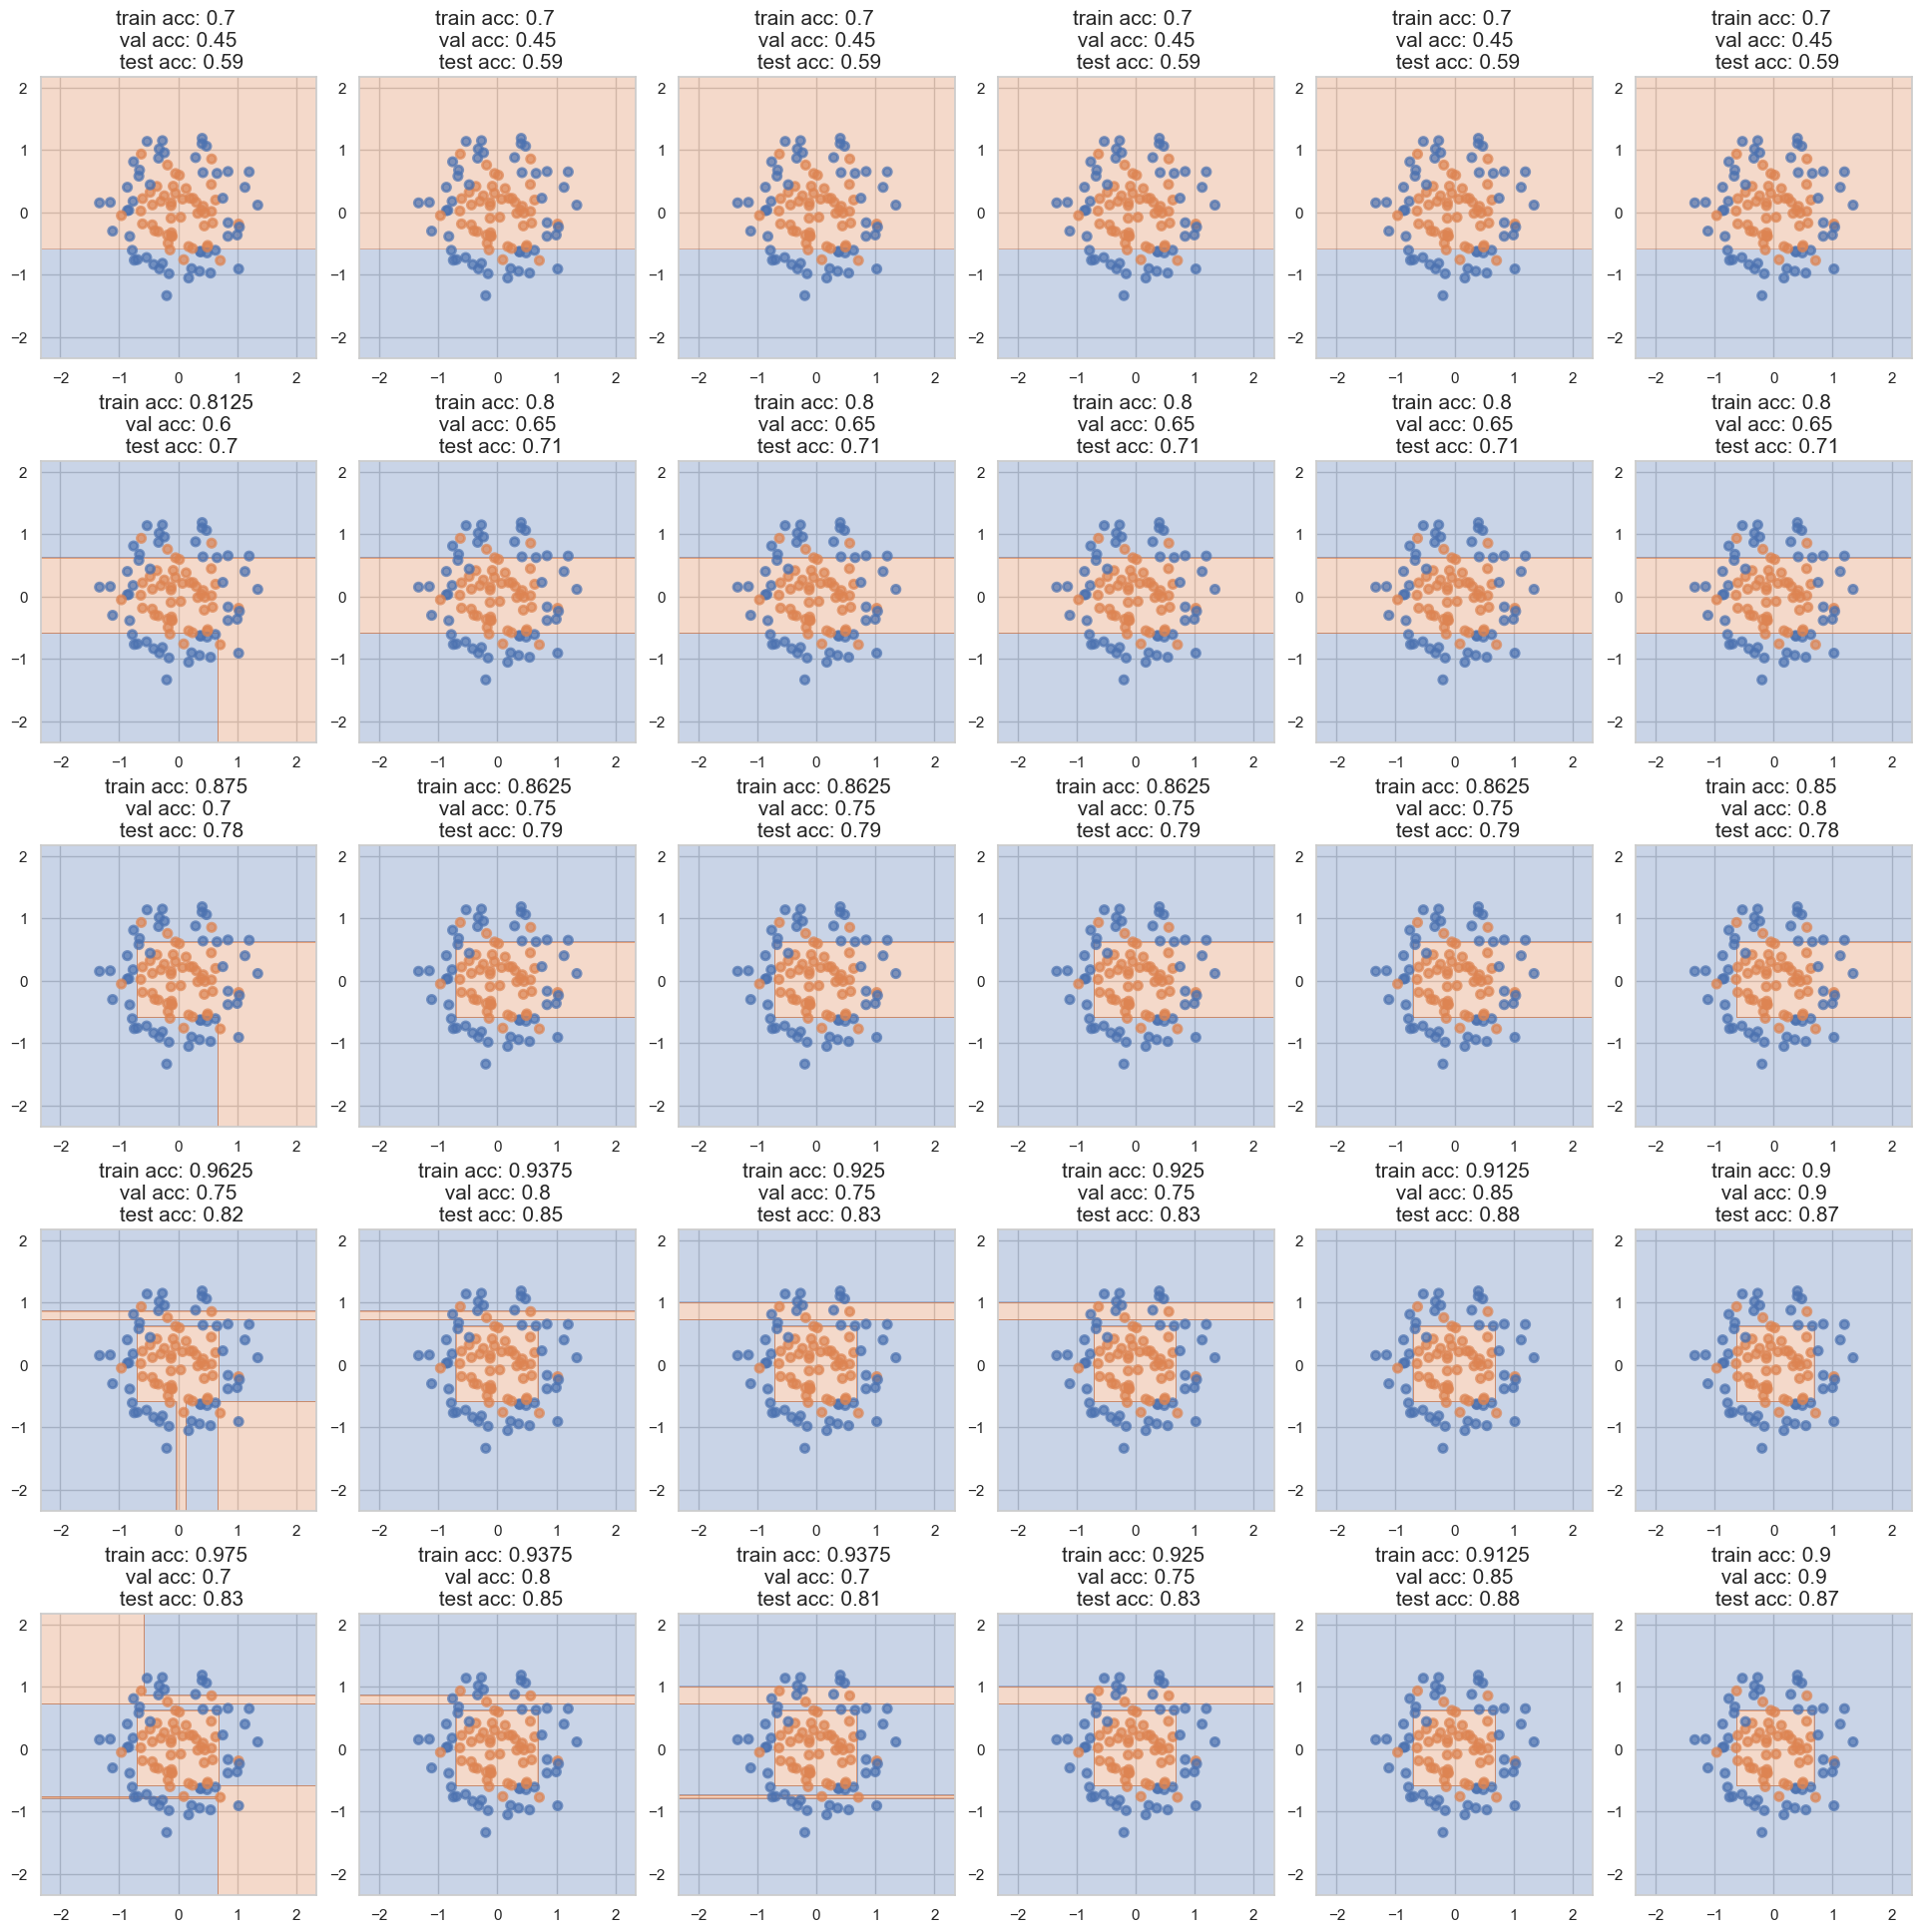

In [14]:
f, ax = plt.subplots(5, 6, figsize=(20, 20))
best_params_for_0 = get_best_params(0, datasets, test_datasets, ax)


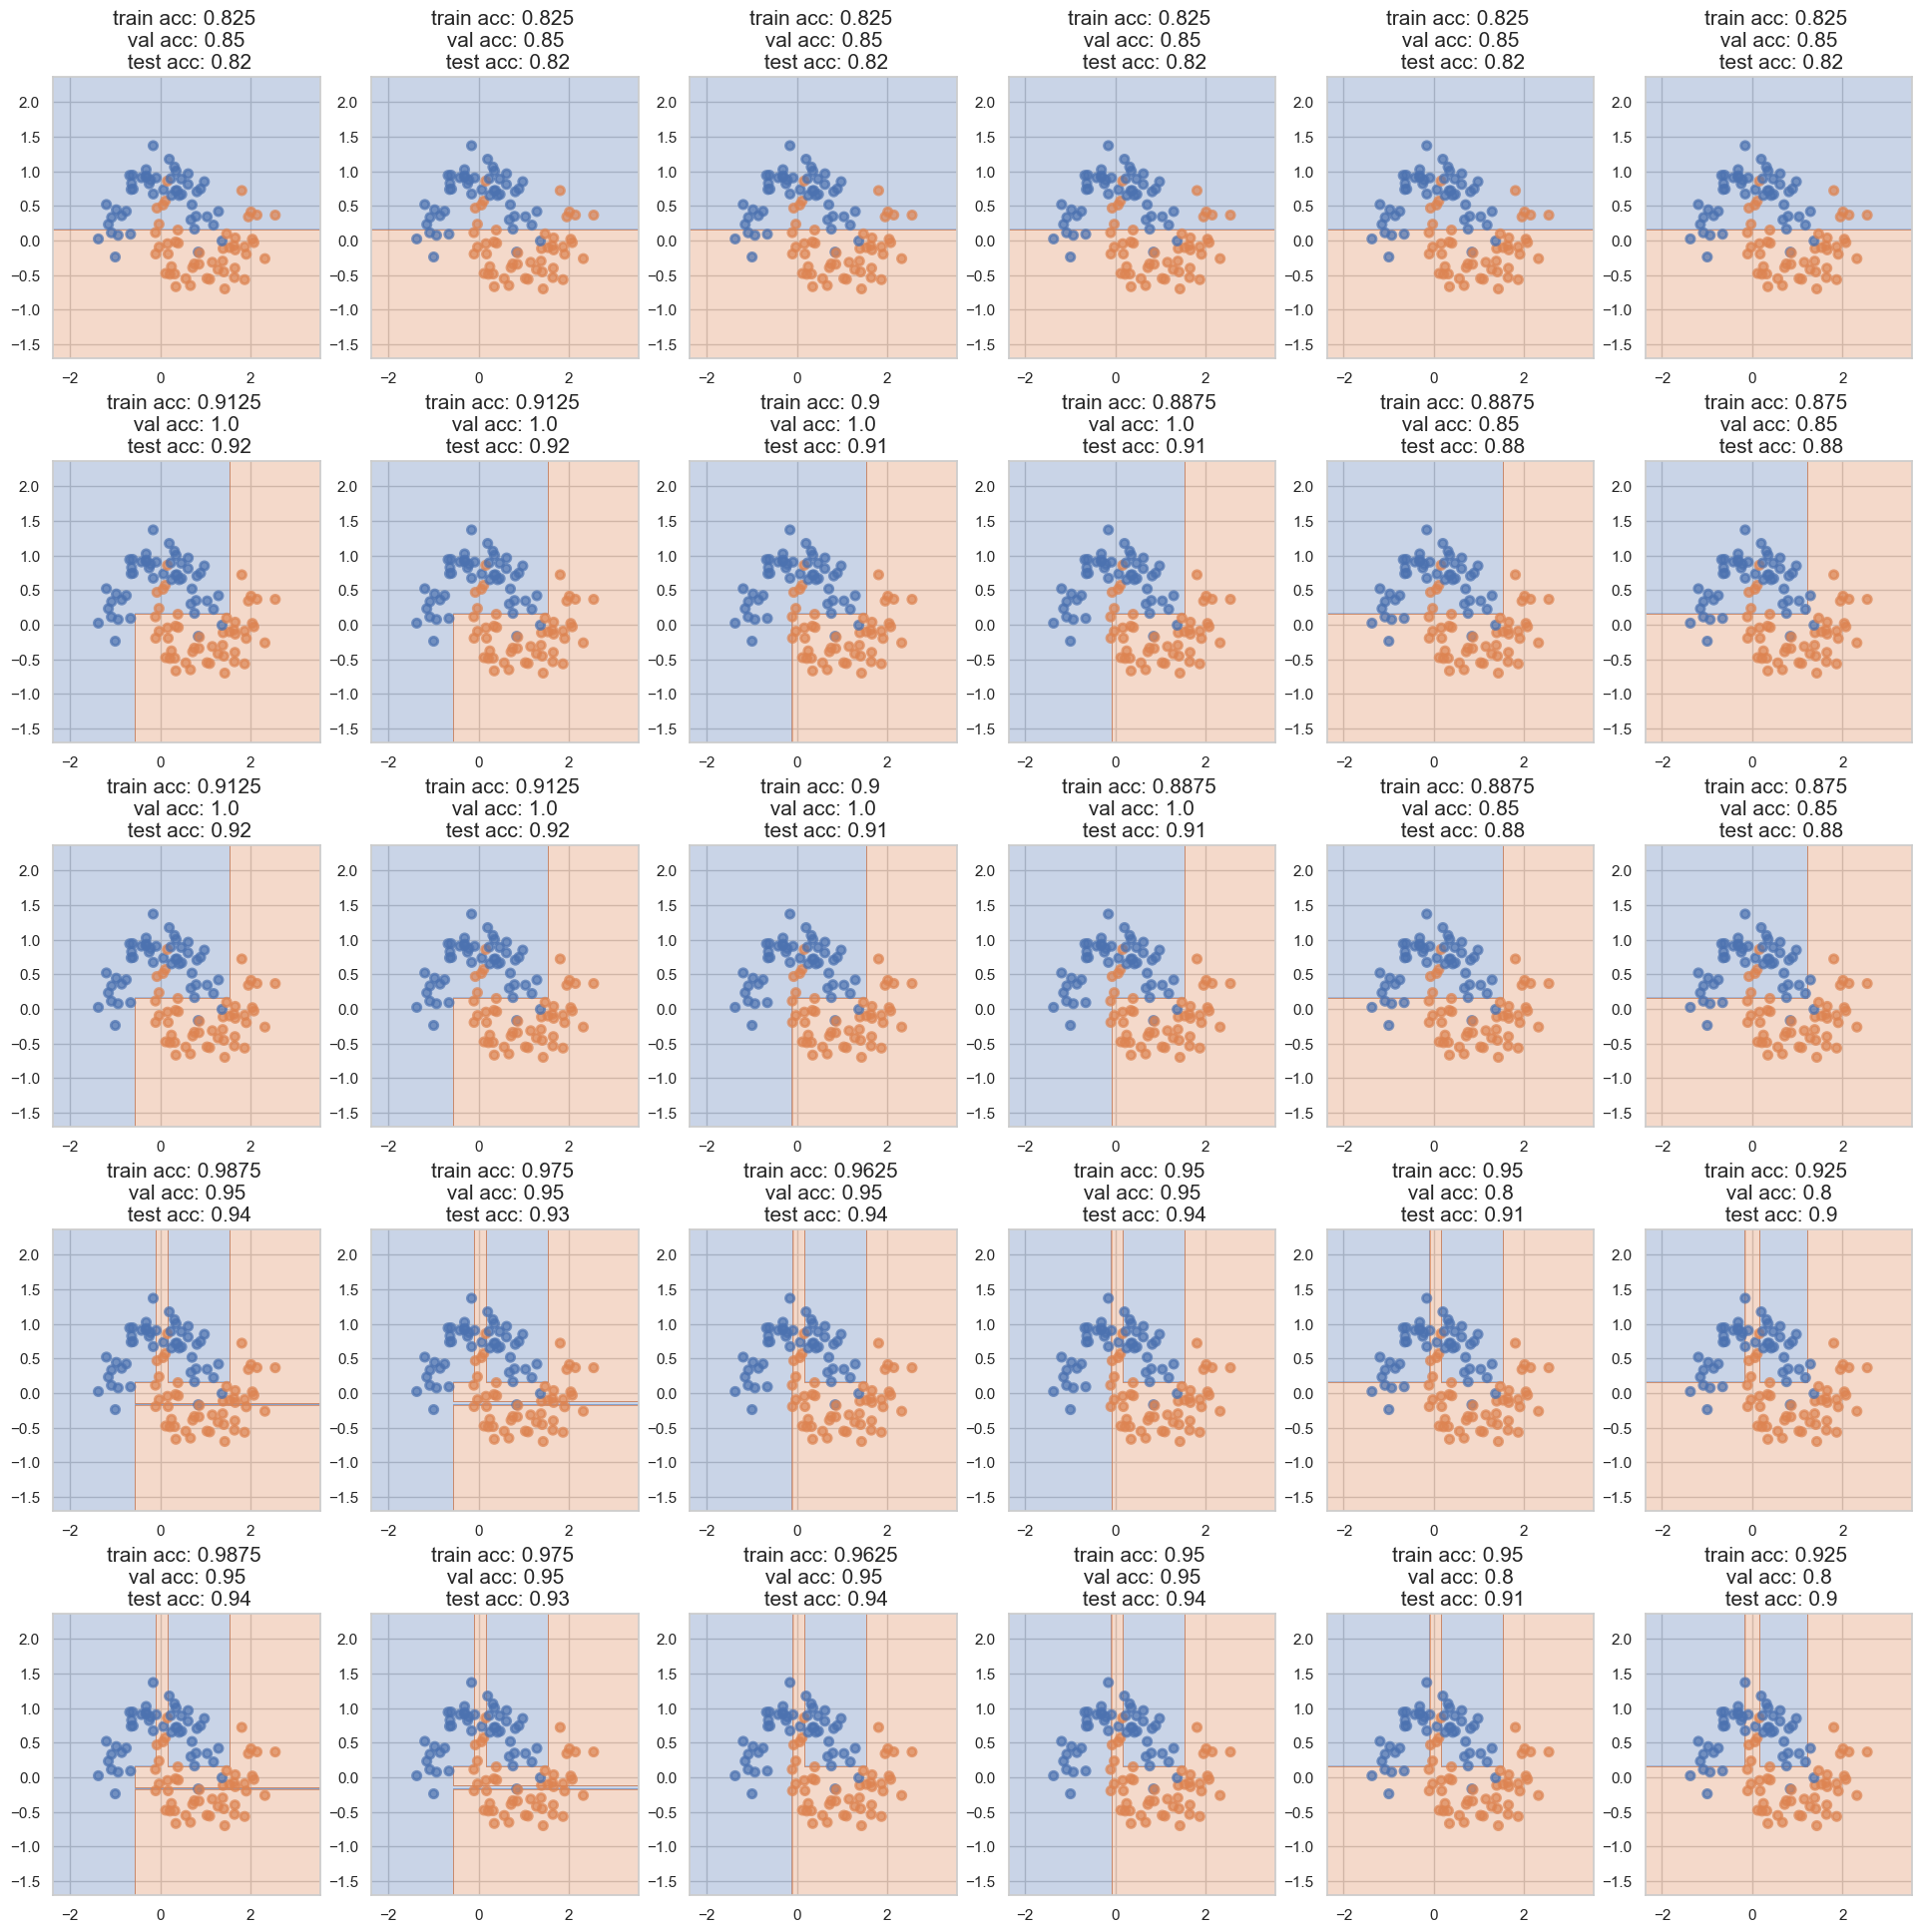

In [15]:
f, ax = plt.subplots(5, 6, figsize=(20, 20))
best_params_for_1 = get_best_params(1, datasets, test_datasets, ax)

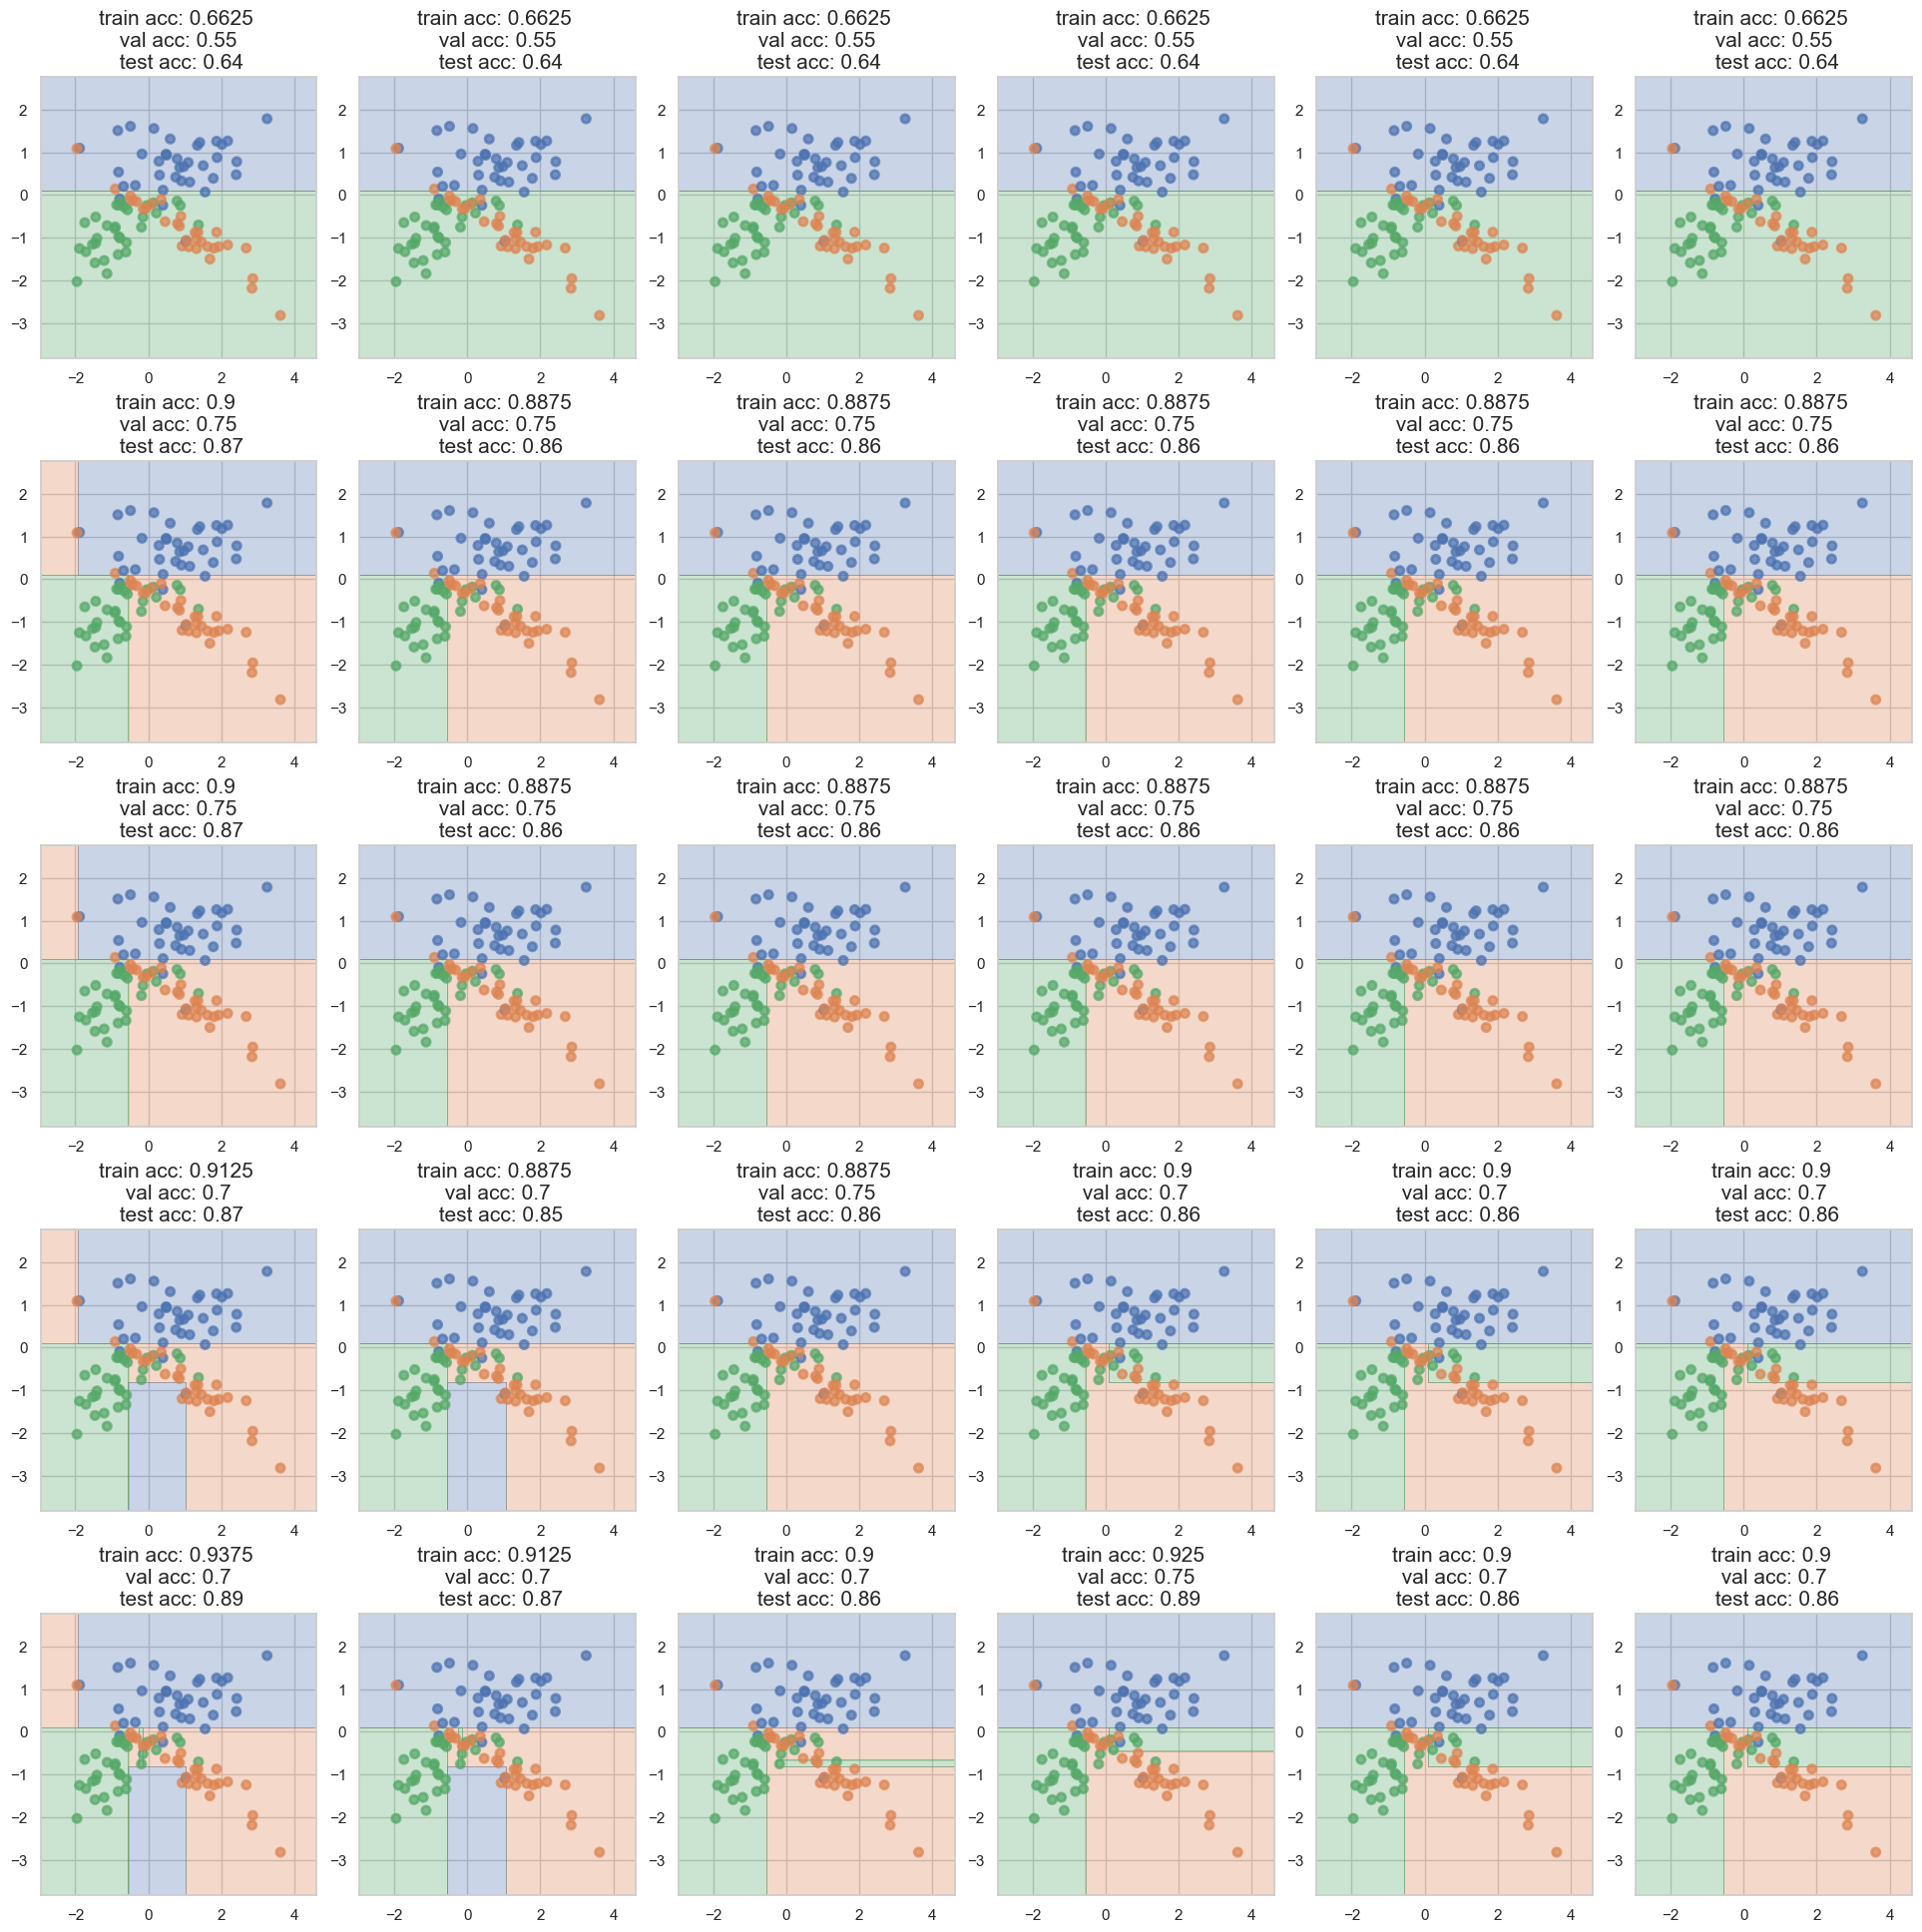

In [16]:
f, ax = plt.subplots(5, 6, figsize=(20, 20))

best_params_for_2 = get_best_params(2, datasets, test_datasets, ax)

In [17]:
best_params_for_0

defaultdict(None,
            {'max_depth': 4,
             'min_samples_leaf': 6,
             'train_acc': 0.9,
             'val_acc': 0.9,
             'test_acc': 0.87})

In [18]:
best_params_for_1

defaultdict(None,
            {'max_depth': 2,
             'min_samples_leaf': 1,
             'train_acc': 0.9125,
             'val_acc': 1.0,
             'test_acc': 0.92})

In [19]:
best_params_for_2

defaultdict(None,
            {'max_depth': 2,
             'min_samples_leaf': 1,
             'train_acc': 0.9,
             'val_acc': 0.75,
             'test_acc': 0.87})

__Ответ:__ Глубина дерева и минимальное число элементов в листе контролируют переобучение, чем меньше глубина и больше минимальное чилос элементов в листе, тем меньше мы подстраиваемся под обучающую выборку. Здесь оптимальные деревья неглубокие, потому что данных мало и они простые. Для всех 3 наборов данных виден один и тот же эффект. Плоскости меняются по разному для разных датасетов.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [20]:
import seaborn as sns
from hw5code import find_best_split

data = pd.read_csv('students.csv')

In [21]:
X = data.drop(columns = 'UNS')
y = data['UNS']

Text(0, 0.5, 'index gini')

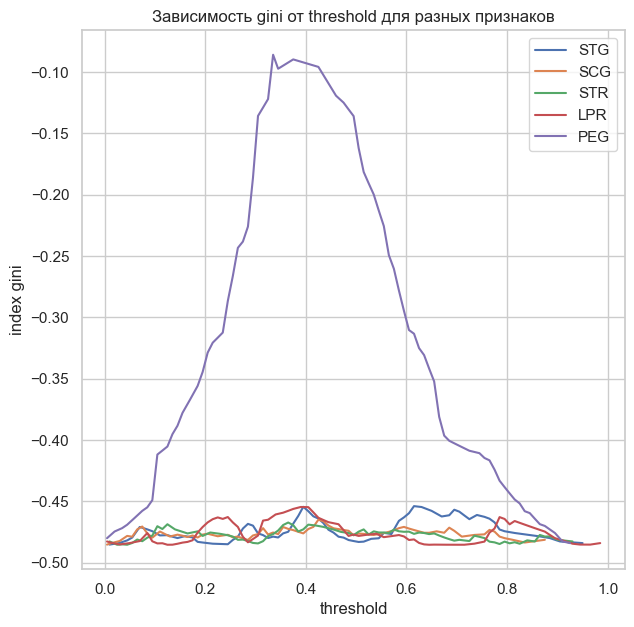

In [22]:
fig = plt.figure(figsize=(7, 7))
for column in X.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(np.array(X[column]), np.array(y))
    sns.lineplot(x=thresholds, y=ginis, legend='brief', label=column).set(title='Зависимость gini от threshold для разных признаков')
plt.xlabel('threshold')
plt.ylabel('index gini')


Text(0, 0.5, 'класс')

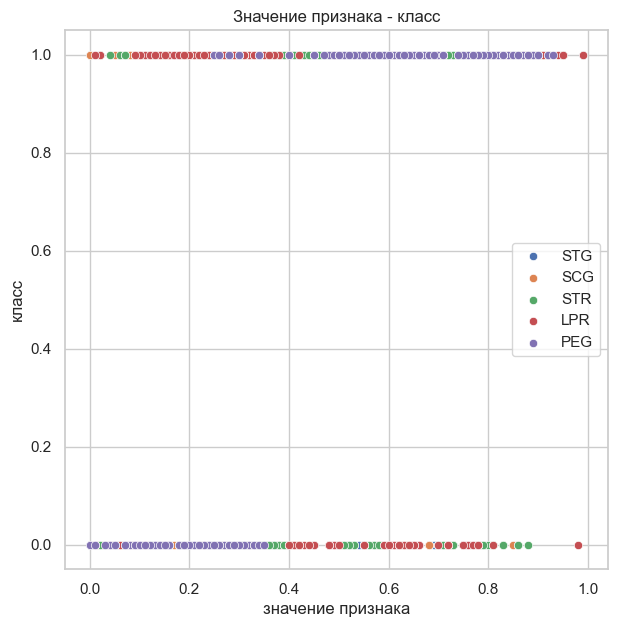

In [23]:
fig = plt.figure(figsize=(7, 7))
for column in X.columns:
    
    sns.scatterplot(x=X[column], y=y, legend='brief', label=column).set(title='Значение признака - класс')
plt.xlabel('значение признака')
plt.ylabel('класс')


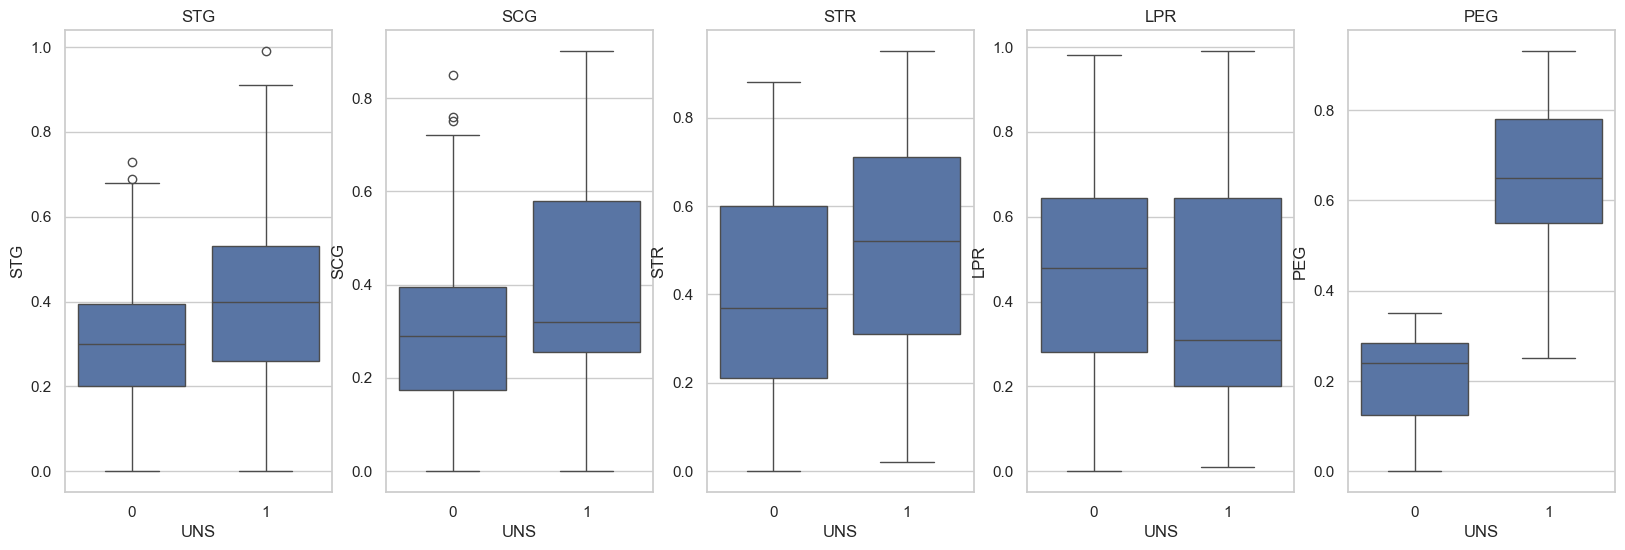

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))
for count, column in enumerate(X.columns):
    sns.boxplot(x=y, y=X[column], ax = ax[count]).set(title=column)
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** И из графика lineplot, и из бокс плотов видно, что лучше всего разделять по признаку PEG, потому что для него индекс джини при правильном пороге максимален и положительный и отрицательный классы хорошо разделимы, у остальных признаков индекс джини колеблется в примерно одном и том же диапазоне, что говорит о невозможности подобрать хороший порог

https://contest.yandex.ru/contest/56884/run-report/100787391/

https://contest.yandex.ru/contest/56884/run-report/100805061/

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [25]:
%load_ext autoreload
%autoreload 2
from hw5code import DecisionTree


In [26]:
data_mushrooms = pd.read_csv('mushroom/agaricus-lepiota.data')
data_mushrooms.loc[data_mushrooms['p'] == 'p', 'p'] = 1
data_mushrooms.loc[data_mushrooms['p'] == 'e', 'p'] = 0


In [27]:
categorical = ['categorical'] * 22


In [28]:
train, test = train_test_split(data_mushrooms, test_size=0.5, random_state=42)
X_train = train.drop(columns = 'p')
y_train = train['p']

X_test = test.drop(columns = 'p')
y_test = test['p']

In [29]:
clf = DecisionTree(categorical)
clf.fit(np.array(X_train), np.array(y_train))
y_pred = clf.predict(np.array(X_test))
score = accuracy_score(np.array(y_test.astype(int)), np.array(y_pred))
print('accuracy:', score)

accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [30]:
data_tic = pd.read_csv('tic-tac-toe-endgame.csv')
data_tic.loc[data_tic['V10'] == 'positive', 'V10'] = 1
data_tic.loc[data_tic['V10'] == 'negative', 'V10'] = 0
train, test = train_test_split(data_tic, test_size=0.2, random_state=42)

X_train_tic = train.drop(columns = 'V10')
y_train_tic = train['V10']

X_test_tic = test.drop(columns = 'V10')
y_test_tic = test['V10']
categorical = ['categorical'] * X_train_tic.shape[1]



Text(0, 0.5, 'test accuracy')

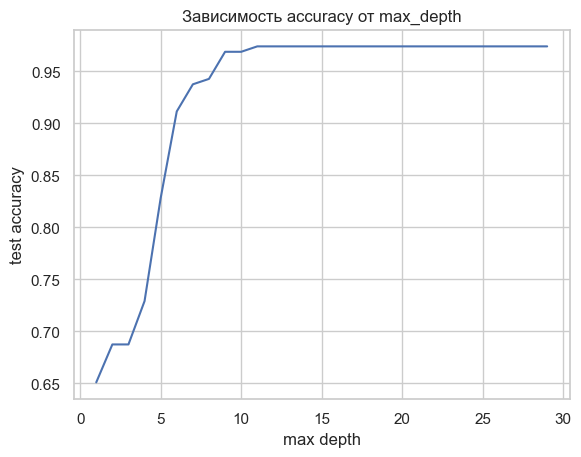

In [31]:
best_val_acc = 0
depth_accuracy = []
max_depths = np.arange(1, 30)
for max_depth in max_depths:
    clf = DecisionTree(categorical, max_depth=max_depth)
    clf.fit(np.array(X_train_tic), np.array(y_train_tic))
    # print(f'current parametres: max_depth = {max_depth}')
    y_pred_test = clf.predict(np.array(X_test_tic))
    score_test = accuracy_score(np.array(y_test_tic.astype(int)), np.array(y_pred_test))
    # print('test accuracy:', score_test)
    depth_accuracy.append(score_test)

sns.lineplot(x=max_depths, y=depth_accuracy).set(title='Зависимость accuracy от max_depth')
plt.xlabel('max depth')
plt.ylabel('test accuracy')


Text(0, 0.5, 'test accuracy')

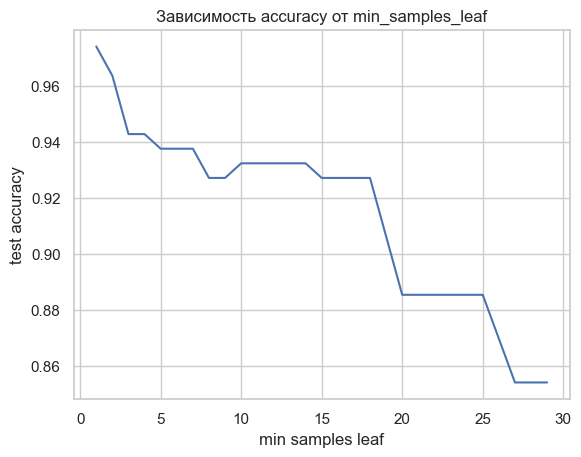

In [32]:
best_val_acc = 0
depth_accuracy = []
min_samples_leafs = np.arange(1, 30)
for min_samples_leaf in min_samples_leafs:
    clf = DecisionTree(categorical, min_samples_leaf=min_samples_leaf)
    clf.fit(np.array(X_train_tic), np.array(y_train_tic))
    # print(f'current parametres: min_samples_leaf = {min_samples_leaf}')
    y_pred_test = clf.predict(np.array(X_test_tic))
    score_test = accuracy_score(np.array(y_test_tic.astype(int)), np.array(y_pred_test))
    # print('test accuracy:', score_test)
    depth_accuracy.append(score_test)

sns.lineplot(x=min_samples_leafs, y=depth_accuracy).set(title='Зависимость accuracy от min_samples_leaf')
plt.xlabel('min samples leaf')
plt.ylabel('test accuracy')


Text(0, 0.5, 'test accuracy')

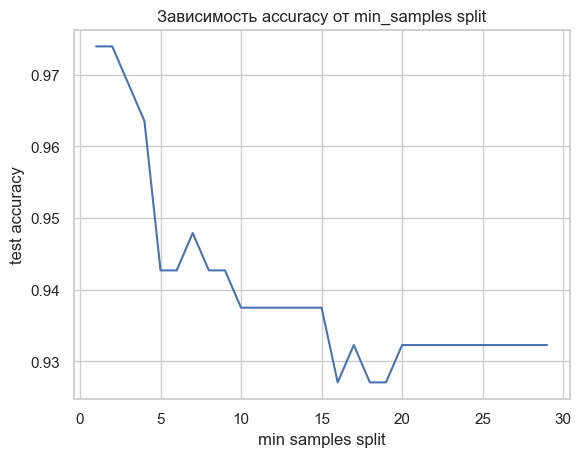

In [137]:
best_val_acc = 0
depth_accuracy = []
min_samples_splits = np.arange(1, 30)
for min_samples_split in min_samples_splits:
    clf = DecisionTree(categorical, min_samples_split=min_samples_split)
    clf.fit(np.array(X_train_tic), np.array(y_train_tic))
    # print(f'current parametres: min_samples_leaf = {min_samples_leaf}')
    y_pred_test = clf.predict(np.array(X_test_tic))
    score_test = accuracy_score(np.array(y_test_tic.astype(int)), np.array(y_pred_test))
    # print('test accuracy:', score_test)
    depth_accuracy.append(score_test)

sns.lineplot(x=min_samples_leafs, y=depth_accuracy).set(title='Зависимость accuracy от min_samples split')
plt.xlabel('min samples split')
plt.ylabel('test accuracy')


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [33]:
data_cars = pd.read_csv('car+evaluation/car.data')
data_cars.loc[(data_cars['unacc'] == 'unacc') | (data_cars['unacc'] == 'acc'), 'unacc'] = 0
data_cars.loc[(data_cars['unacc'] == 'good') | (data_cars['unacc'] == 'vgood'), 'unacc'] = 1
data_cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,1
1723,low,low,5more,more,med,high,1
1724,low,low,5more,more,big,low,0
1725,low,low,5more,more,big,med,1


In [34]:
data_nursery = pd.read_csv('nursery/nursery.data')
data_nursery.loc[(data_nursery['recommend'] == 'not_recom') | (data_nursery['recommend'] == 'recommend') , 'recommend'] = 0
data_nursery.loc[(data_nursery['recommend'] == 'very_recom') | (data_nursery['recommend'] == 'priority') | (data_nursery['recommend'] == 'spec_prior') , 'recommend'] = 1
data_nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1


# Mushrooms

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [87]:
experiments_mushrooms = []

In [88]:
X_mush = data_mushrooms.drop(columns='p')
X_mush = X_mush.apply(LabelEncoder().fit_transform)
y_mush = data_mushrooms['p'].astype(int)
features = ['real'] * X_mush.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_mush), np.array(y_mush), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_mushrooms.append(np.mean(res))



In [89]:
X_mush = data_mushrooms.drop(columns='p')
y_mush = data_mushrooms['p'].astype(int)
features = ['categorical'] * X_mush.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_mush), np.array(y_mush), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_mushrooms.append(np.mean(res))



In [90]:
X_mush = data_mushrooms.drop(columns='p')
y_mush = data_mushrooms['p'].astype(int)
X_mush = OneHotEncoder(sparse=False).fit_transform(X_mush)
features = ['real'] * X_mush.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_mush), np.array(y_mush), scoring=make_scorer(accuracy_score),  cv=10,  error_score="raise"))
experiments_mushrooms.append(np.mean(res))




In [91]:
clf = tree.DecisionTreeClassifier(random_state=42)
X_mush = data_mushrooms.drop(columns='p')
X_mush = X_mush.apply(LabelEncoder().fit_transform)
y_mush = data_mushrooms['p'].astype(int)
res = []
res.append(cross_val_score(clf, np.array(X_mush), np.array(y_mush), cv=10, scoring=make_scorer(accuracy_score), error_score="raise"))
experiments_mushrooms.append(np.mean(res))

# Tic tac

In [105]:
experiments_tic = []

In [106]:
X_tic = data_tic.drop(columns = 'V10')
y_tic = data_tic['V10'].astype(int)
X_tic = X_tic.apply(LabelEncoder().fit_transform)
features = ['real'] * X_tic.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_tic), np.array(y_tic), scoring=make_scorer(accuracy_score),  cv=10,  error_score="raise"))
experiments_tic.append(np.mean(res))

In [107]:
X_tic = data_tic.drop(columns='V10')
y_tic = data_tic['V10'].astype(int)
features = ['categorical'] * X_tic.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_tic), np.array(y_tic), scoring=make_scorer(accuracy_score),  cv=10,  error_score="raise"))
experiments_tic.append(np.mean(res))

In [108]:
X_tic = data_tic.drop(columns='V10')
y_tic = data_tic['V10'].astype(int)
X_tic = OneHotEncoder(sparse=False).fit_transform(X_tic)
features = ['real'] * X_tic.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_tic), np.array(y_tic), scoring=make_scorer(accuracy_score),  cv=10,  error_score="raise"))
experiments_tic.append(np.mean(res))

In [109]:
clf = tree.DecisionTreeClassifier(random_state=42)
X_tic = data_tic.drop(columns='V10')
X_tic = X_tic.apply(LabelEncoder().fit_transform)
y_tic = data_tic['V10'].astype(int)
res = []
res.append(cross_val_score(clf, X_tic, y_tic, scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_tic.append(np.mean(res))

# Cars

In [116]:
experiments_cars = []

In [117]:
X_car = data_cars.drop(columns='unacc')
X_car = X_car.apply(LabelEncoder().fit_transform)
y_car =  data_cars['unacc'].astype(int)

features = ['real'] * X_car.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_car), np.array(y_car), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_cars.append(np.mean(res))

In [119]:
X_car = data_cars.drop(columns='unacc')
y_car =  data_cars['unacc'].astype(int)
features = ['categorical'] * X_car.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_car), np.array(y_car), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_cars.append(np.mean(res))

In [121]:
X_car = data_cars.drop(columns='unacc')
y_car =  data_cars['unacc'].astype(int)
X_car = OneHotEncoder(sparse=False).fit_transform(X_car)
features = ['real'] * X_car.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_car), np.array(y_car), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_cars.append(np.mean(res))

In [123]:
clf = tree.DecisionTreeClassifier(random_state=42)
X_car = data_cars.drop(columns='unacc')
X_car = X_car.apply(LabelEncoder().fit_transform)
y_car =  data_cars['unacc'].astype(int)
res = []
res.append(cross_val_score(clf, X_car, y_car, scoring=make_scorer(accuracy_score), cv=10, error_score="raise"))
experiments_cars.append(np.mean(res))

# Nursery

In [125]:
experiments_nursery = []

In [126]:
X_nur = data_nursery.drop(columns='recommend')
X_nur = X_nur.apply(LabelEncoder().fit_transform)
y_nur =  data_nursery['recommend'].astype(int)

features = ['real'] * X_nur.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_nur), np.array(y_nur), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_nursery.append(np.mean(res))

In [127]:
X_nur = data_nursery.drop(columns='recommend')
y_nur =  data_nursery['recommend'].astype(int)
features = ['categorical'] * X_nur.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_nur), np.array(y_nur), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_nursery.append(np.mean(res))

In [128]:
X_nur = data_nursery.drop(columns='recommend')
y_nur =  data_nursery['recommend'].astype(int)
X_nur = OneHotEncoder(sparse=False).fit_transform(X_nur)
features = ['real'] * X_nur.shape[1]
res = []
res.append(cross_val_score(DecisionTree(features), np.array(X_nur), np.array(y_nur), scoring=make_scorer(accuracy_score),  cv=10, error_score="raise"))
experiments_nursery.append(np.mean(res))

In [129]:
clf = tree.DecisionTreeClassifier(random_state=42)
X_nur = data_nursery.drop(columns='recommend')
y_nur =  data_nursery['recommend'].astype(int)
X_nur = X_nur.apply(LabelEncoder().fit_transform)
res = []
res.append(cross_val_score(clf, X_nur, y_nur, scoring=make_scorer(accuracy_score), cv=10, error_score="raise"))
experiments_nursery.append(np.mean(res))

In [135]:
dictionary = {'mushrooms' : experiments_mushrooms, 
              'tic tac' : experiments_tic, 
              'cars' : experiments_cars, 
              'nursery' : experiments_nursery}
result = pd.DataFrame.from_dict(dictionary, orient='index', columns=['all real LE', 'all categorical', 'all real OHE', 'library classifier'])
result

,all real LE,all categorical,all real OHE,library classifier
mushrooms,0.999261,1.000000,0.999631,0.961984
tic tac,0.467533,0.541458,0.543575,0.771678
cars,0.942600,0.967519,0.921767,0.944371
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Для всех датаестов, кроме tic-tac-toe наш алгоритм, который считает все признаки категориальными работает лучше всего. При этом для tic-tac-toe лучшим оказася решающее делево из sklearn.  Понятно, что алгоритмы, считающие все признаки численными с этими данными работют плохо, потому что здесь признаки категориальные, поэтому странно их упорядочивать и использовать как численные

В результатах присутствует случайность, потому что данных достаточно мало, а мы используем кросс валидацию, поэтому все сильно зависит от того, на сколько фолдов мы бьем выборку. Можно попробовать перебрать другие значения для cv, чтобы улучшить результат

Вставьте что угодно, описывающее ваши впечатления от этого задания: